In [ ]:
# Config
import os
prefix = '../../'

In [ ]:
# Imports
import matplotlib.pyplot as plt
from xai.performance_benchmarking.benchmarking_pipelines import robustness_benchmarking_pipeline
from xai.viz.util_viz import plot_robustness_comparisons

/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
data = os.path.join(prefix, 'datasets', 'census_dataset.csv')
lips1, tdelta1 = robustness_benchmarking_pipeline(model_type='rf', explainer_type='shap', num_samples=100,
                                                  lipshitz_optimiser='gbrt', lipshitz_bound_type='box', n_jobs=1,
                                                  data_file_name=data, target_name='y', random_seed=42)

lips2, tdelta2 = robustness_benchmarking_pipeline(model_type='rf', explainer_type='lime', num_samples=100,
                                                  lipshitz_optimiser='gbrt', lipshitz_bound_type='box', n_jobs=1,
                                                  data_file_name=data, target_name='y', random_seed=42)

lips12, tdelta12 = robustness_benchmarking_pipeline(model_type='rf', explainer_type='shap', num_samples=100,
                                                    lipshitz_optimiser='gp', lipshitz_bound_type='box', n_jobs=1,
                                                    data_file_name=data, target_name='y', random_seed=42)

lips22, tdelta22 = robustness_benchmarking_pipeline(model_type='rf', explainer_type='lime', num_samples=100,
                                                    lipshitz_optimiser='gp', lipshitz_bound_type='box', n_jobs=1,
                                                    data_file_name=data, target_name='y', random_seed=42)


Identified 0 out of 12 features as categorical.

Input dataset shape: 
x (26048, 12), 	y 26048
Model type: <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Model test performance: 	AUC = 0.752, 	Gini = 0.504
Process took 0.83 s.
Initializing tree SHAP explainer wrapper
Missed points: 0/100
Time elapsed for shap with Gradient Boosted Tree opt 1.1e+02 s
Median Lipschitz estimate for shap = 0.0768
Identified 0 out of 12 features as categorical.

Input dataset shape: 
x (26048, 12), 	y 26048
Model type: <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Model test performance: 	AUC = 0.752, 	Gini = 0.504
Process took 0.88 s.
Initializing tabular LIME explainer wrapper
Missed points: 0/100
Time elapsed for lime with Gradient Boosted Tree opt 4.2e+01 s
Median Lipschitz estimate for lime = 0.00581
Identified 0 out of 12 features as categorical.

Input dataset shape: 
x (26048, 12), 	y 26048
Model type: <class 'sklearn.ensemble.forest.RandomForestClassifier'>
Model test performan

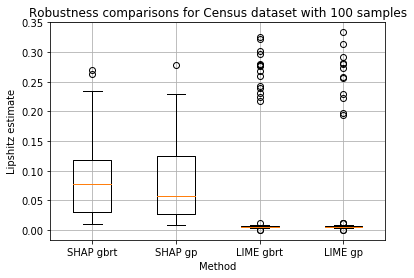

In [11]:
fig = plot_robustness_comparisons([lips1, lips12, lips2, lips22], dataset_name ='Census',
                                  model_names=['SHAP gbrt', 'SHAP gp', 'LIME gbrt', 'LIME gp'])
fig.savefig(fname='Robustness comparison.png')
fig

### Robustness test on regression (boston) dataset

In [ ]:
data = os.path.join(prefix, 'datasets', 'boston_dataset.csv')

lips1, tdelta1 = robustness_benchmarking_pipeline(model_type='rf', explainer_type='shap', num_samples=100,
                                                  lipshitz_optimiser='gbrt', lipshitz_bound_type='box', n_jobs=1,
                                                  data_file_name=data, target_name='y', random_seed=42)

lips2, tdelta2 = robustness_benchmarking_pipeline(model_type='rf', explainer_type='lime', num_samples=100,
                                                  lipshitz_optimiser='gbrt', lipshitz_bound_type='box', n_jobs=1,
                                                  data_file_name=data, target_name='y', random_seed=42)

lips12, tdelta12 = robustness_benchmarking_pipeline(model_type='rf', explainer_type='shap', num_samples=100,
                                                    lipshitz_optimiser='gp', lipshitz_bound_type='box', n_jobs=1,
                                                    data_file_name=data, target_name='y', random_seed=42)

lips22, tdelta22 = robustness_benchmarking_pipeline(model_type='rf', explainer_type='lime', num_samples=100,
                                                    lipshitz_optimiser='gp', lipshitz_bound_type='box', n_jobs=1,
                                                    data_file_name=data, target_name='y', random_seed=42)

fig = plot_robustness_comparisons([lips1, lips12, lips2, lips22], dataset_name ='Boston',
                                  model_names=['SHAP gbrt', 'SHAP gp', 'LIME gbrt', 'LIME gp'])
fig.savefig(fname='Robustness_comparison_on_Boston.png')
print([tdelta1, tdelta12, tdelta2, tdelta22])
fig